In [1]:
!pip install rasterio
!pip install geotiff
!pip install tifffile
!pip install image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.8/185.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.7 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=8830e34564fa1c65b9684dbb10c1773f22cb2ff651f126061bb4119fc257f855
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.4 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=d85a4ded811dd96fc4778ed5afd3831601116db76b6fc115b0c75d4ed3dfa306
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


lab : 01
"READING TIFF IMAGES":

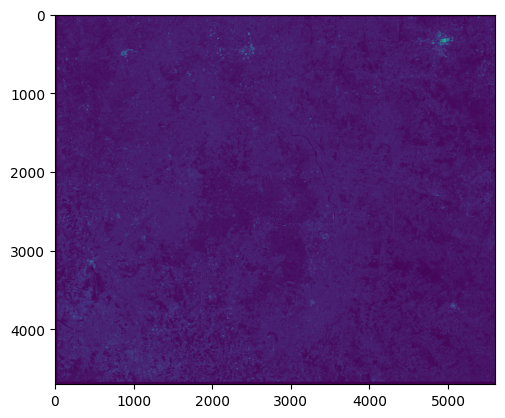

In [13]:
# import rasterio
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
from PIL import Image
img = Image.open("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")
show(img)
pixels = img.load()

"META DATA ABOUT TIFF IMAGES"

In [14]:
import rasterio

# Open the GeoTIFF image
with rasterio.open("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif") as dataset:
    # Check the size (dimensions)
    width = dataset.width
    height = dataset.height
    print("Image Size (Width x Height):", width, "x", height)

    # Check the number of bands
    num_bands = dataset.count
    print("Number of Bands:", num_bands)

Image Size (Width x Height): 5600 x 4700
Number of Bands: 1


In [15]:
dataset.count
dataset.width
dataset.height

4700

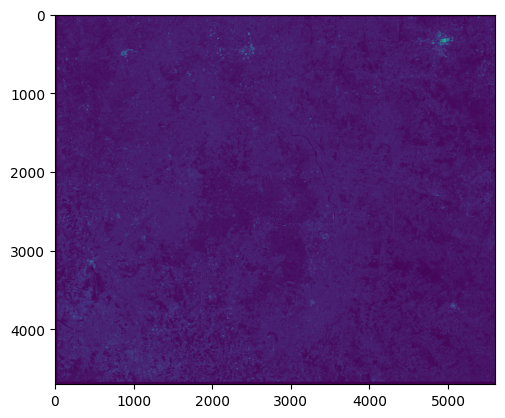

In [16]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)

In [17]:
!pip install numpy

In [18]:
import numpy as np
from PIL import Image

# Open the image
img = Image.open("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")

# Convert the image to a NumPy array
img_array = np.array(img)

# Calculate image statistics
mean = np.mean(img_array)
std_dev = np.std(img_array)
min = np.min(img_array)
max = np.max(img_array)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Min:", min)
print("Max:", max)

Mean: 4575.521673404255
Standard Deviation: 2379.305884866578
Min: 0
Max: 65535


In [19]:
width, height = img.size

# Print the results
print("Width:", width)
print("Height:", height)

Width: 5600
Height: 4700


"REDUCING SIZE OF IMAGE"

In [20]:
from rasterio.plot import show
# import rasterio
import geotiff
import tifffile
# from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np


try:
    # Read image from disk.
    img = cv2.imread("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")

    # Get number of pixel horizontally and vertically.
    (height, width) = img.shape[:2]

    # Specify the size of image along with interpolation methods.
    # cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC
    # is used for zooming.
    res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)

    # Write image back to disk.
    cv2.imwrite('result.tiff', res)

except IOError:
    print('Error while reading files !!!')

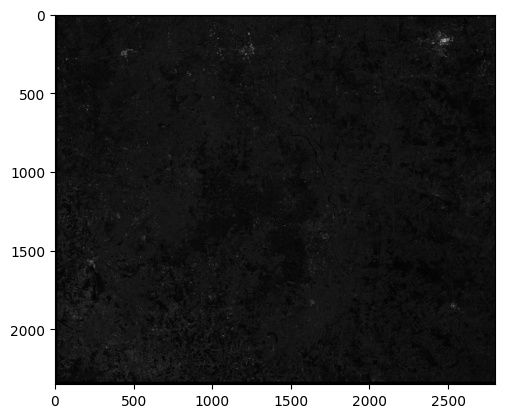

In [21]:
plt.imshow(res)

"ROTATING TIFF IMAGES"

In [22]:
try:
    # Read image from disk.
    img = cv2.imread("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")

     # Shape of image in terms of pixels.
    (rows, cols) = img.shape[:2]

    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    res1 = cv2.warpAffine(img, M, (cols, rows))

    # Write image back to disk.
    cv2.imwrite('result.tiff', res1)

except IOError:
    print('Error while reading files !!!')

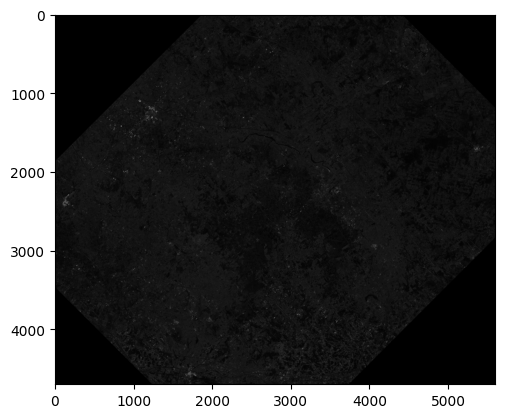

In [23]:
plt.imshow(res1)

"TRANSLATING MATRIX"

In [24]:
# Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
try:
    # Read image from disk.
    img = cv2.imread("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")

     # warpAffine does appropriate shifting given the
    # translation matrix.
    res2 = cv2.warpAffine(img, M, (cols, rows))

    # Write image back to disk.
    cv2.imwrite('result.tiff', res2)

except IOError:
    print('Error while reading files !!!')

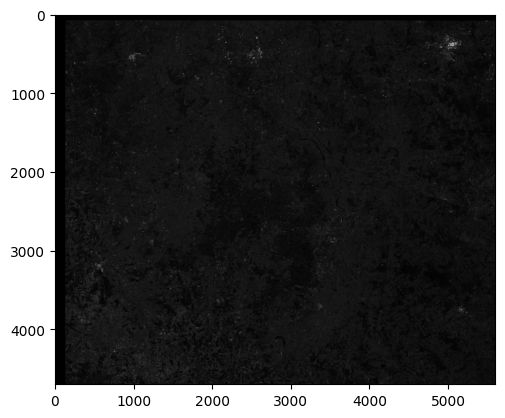

In [25]:
plt.imshow(res2)

"CANNY EDGE DETECTION"

In [26]:
try:
    # Read image from disk.
    img = cv2.imread("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")


     # Canny edge detection.
    edges = cv2.Canny(img, 15, 10)

    # Write image back to disk.
    cv2.imwrite('result.tiff', edges)

except IOError:
    print('Error while reading files !!!')

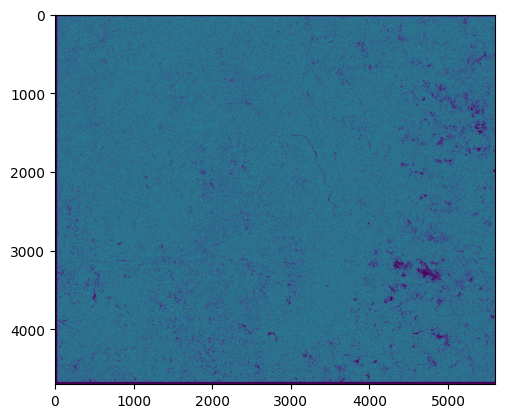

In [27]:
plt.imshow(edges)

"RGB"

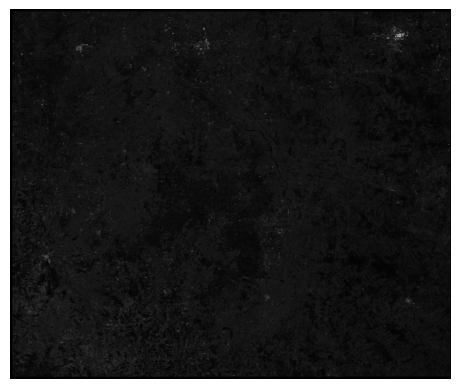

In [28]:

import cv2
import matplotlib.pyplot as plt

# Read the image
img2 = cv2.imread("/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif")

# Convert BGR to RGB color space (matplotlib expects RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img2_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()